In [1]:
import pandas as pd
df = pd.read_csv("D:\\Data science\\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [2]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [3]:
df.shape

(600, 6)

In [4]:
df[df.values==0.0]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
5,NO,Divorced,33329,116382,0,NO
30,YES,Divorced,73854,117788,0,YES
78,YES,Divorced,73411,143153,0,NO
160,YES,Divorced,87677,79972,0,YES
185,NO,Married,64614,92975,0,YES
202,YES,Single,70365,28661,0,YES
225,YES,Single,42488,125883,0,YES
249,YES,Single,39144,35376,0,YES
275,YES,Married,86208,55591,0,YES
347,NO,Married,16082,80991,0,YES


In [5]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df[df.duplicated()].shape

(0, 6)

In [8]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [9]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [11]:
df['Taxable.Income'].max()

99619

In [12]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban', 'taxable_category'], dtype='object')

In [14]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

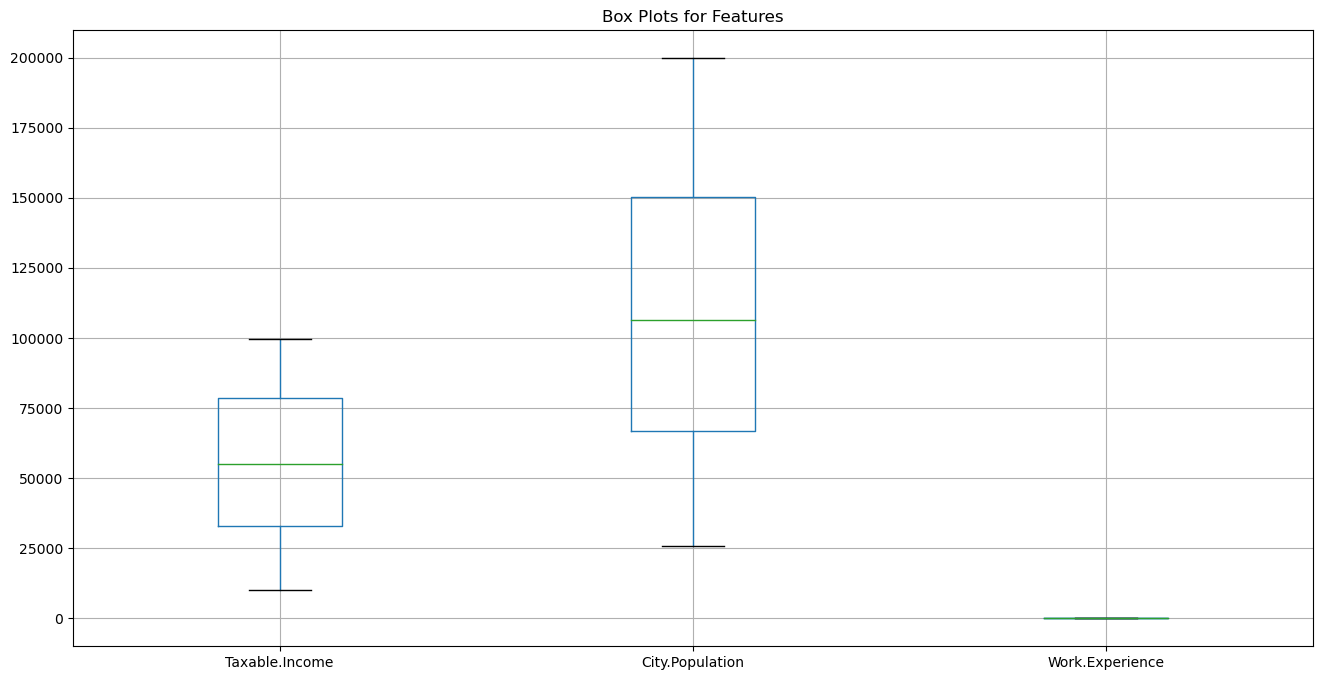

In [15]:
# Visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 8))
df.boxplot()
plt.title("Box Plots for Features")
plt.show()

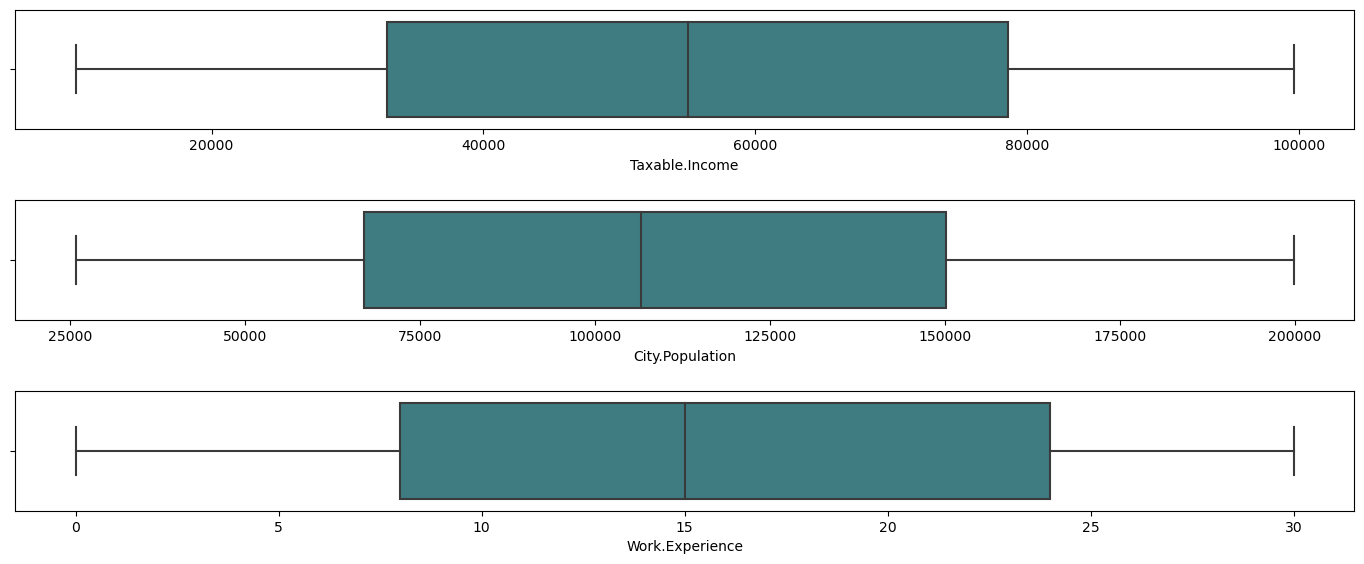

In [16]:
ot=df.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

<Figure size 800x800 with 0 Axes>

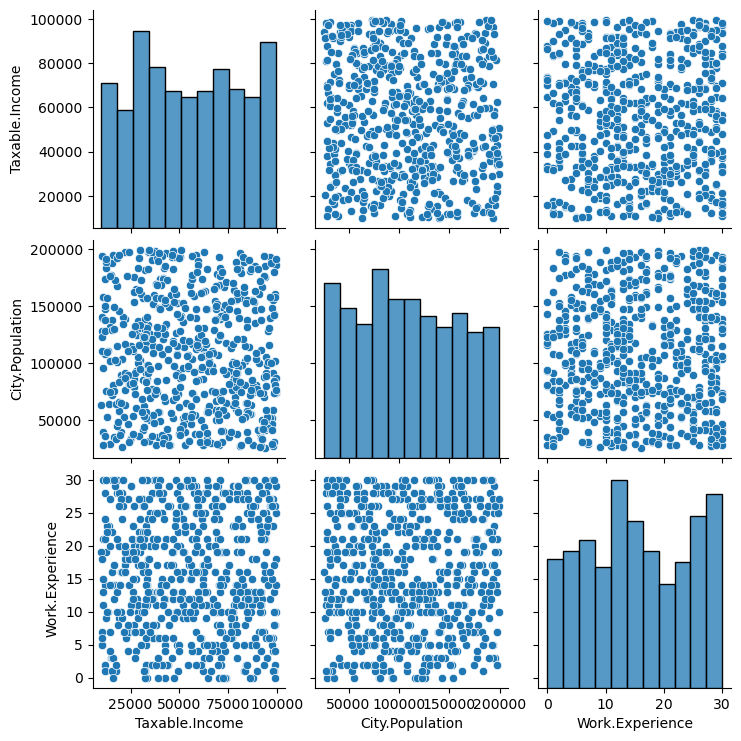

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

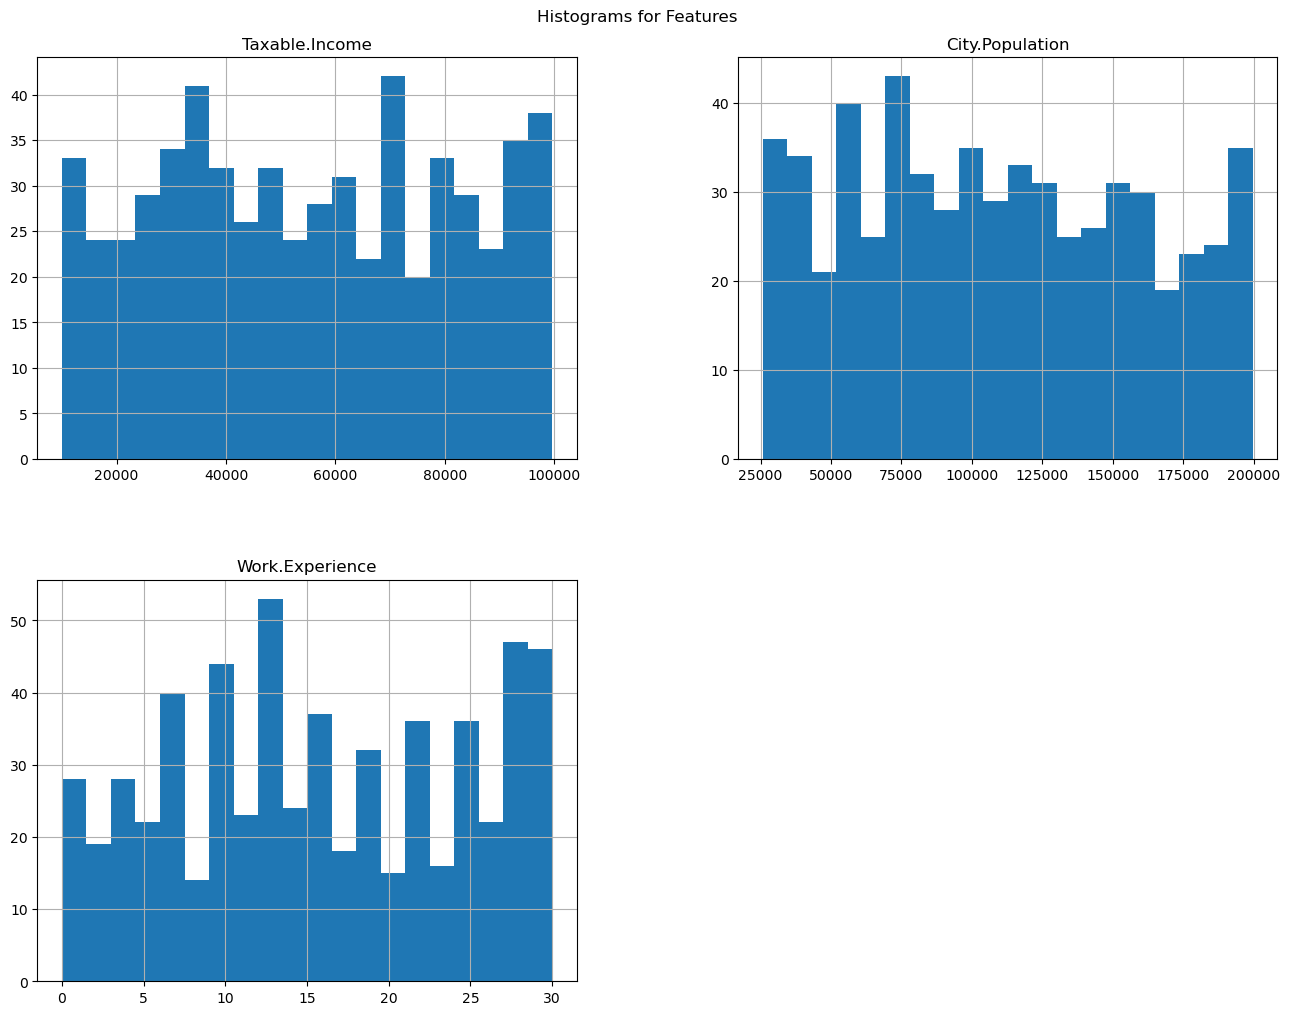

In [18]:
# Histograms for features
df.hist(figsize=(16, 12), bins=20)
plt.suptitle("Histograms for Features", y=0.92)
plt.show()

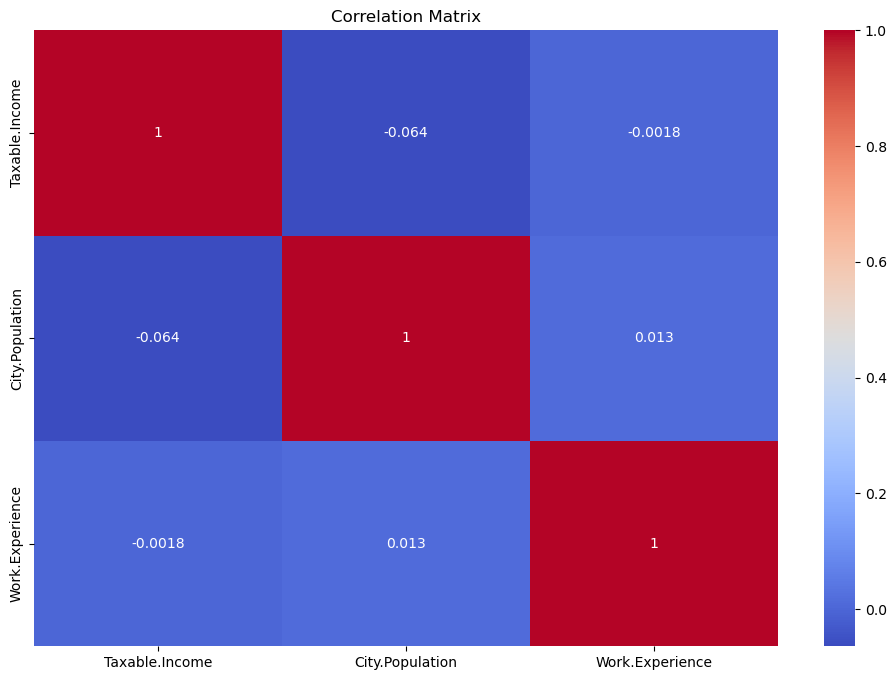

In [19]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Risky  or Good for taxable income')

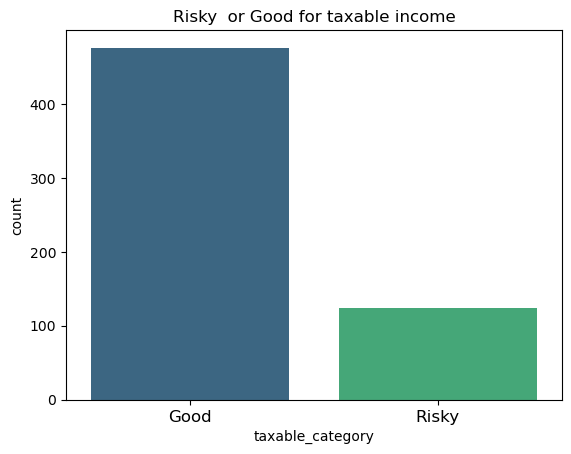

In [20]:
sns.countplot(x='taxable_category', data=df1, palette = 'viridis', 
              order=df1['taxable_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky  or Good for taxable income')

In [21]:
data = df1.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [22]:
#Creating dummy vairables of the categorical features
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [23]:
x = data.drop('taxable_category',axis=1)
y = data['taxable_category']

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
#data prtition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.30)

rf=RandomForestClassifier()
param_grid={'n_estimators':[10,50,100],'max_depth':[None,10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
grid_search=GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
print('best hyper parameters:',grid_search.best_params_)

best hyper parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [29]:
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print('Accuracy on test data set:',format(accuracy))

Accuracy on test data set: 0.780952380952381


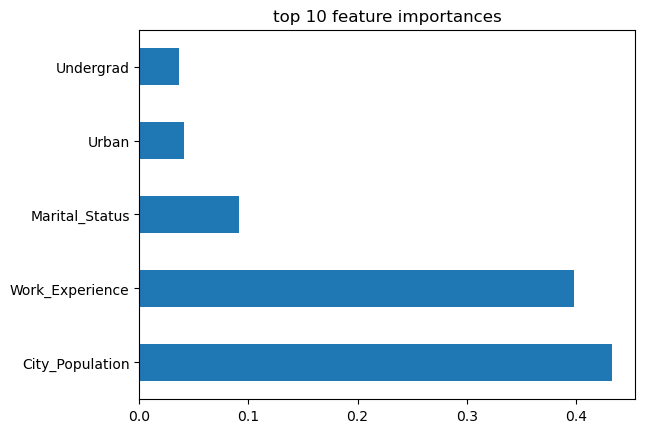

In [30]:
if hasattr(best_model,'feature_importances_'):
    feature_importances=pd.Series(best_model.feature_importances_,index=X_train.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title('top 10 feature importances')
    plt.show()

In [31]:
#model fitting
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

# validation set approach
import numpy as np
from sklearn.metrics import mean_squared_error
training_error=[]
test_error=[]

for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train=DT.predict(X_train)
    Y_pred_test=DT.predict(X_test)
    training_error.append(mean_squared_error(Y_train,Y_pred_train))
    test_error.append(mean_squared_error(Y_test,Y_pred_test))
    
    
print("Avearge training error:",np.sqrt(training_error).round(3))
print("Avearge test error :",np.sqrt(test_error).round(3))

Avearge training error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Avearge test error : [0.645 0.582 0.606 0.587 0.553 0.65  0.619 0.573 0.628 0.624 0.606 0.596
 0.548 0.568 0.628 0.577 0.645 0.65  0.573 0.573 0.587 0.563 0.568 0.587
 0.645 0.606 0.619 0.641 0.606 0.624 0.582 0.606 0.577 0.61  0.582 0.592
 0.615 0.577 0.587 0.568 0.563 0.582 0.615 0.573 0.587 0.568 0.563 0.596
 0.628 0.573 0.592 0.65  0.592 0.596 0.61  0.606 0.489 0.563 0.596 0.624
 0.619 0.592 0.61  0.632 0.641 0.582 0.61  0.573 0.527 0.592 0.601 0.582
 0.61  0.592 0.577 0.61  0.624 0.596 0.606 0.645 0.568 0.606 0.527 0.624
 0.577 0.619 0.624 0.624 0.641 0.61  0.582 0.558 0.582 0.619 0.61  0.632
 0.624 0.582 0.592 0.628]


In [32]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100,max_samples=0.6,max_features=0.7)

training_error=[]
test_error=[]



for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR.fit(X_train,Y_train)
    Y_pred_train=RFR.predict(X_train)
    Y_pred_test=RFR.predict(X_test)
    training_error.append(mean_squared_error(Y_train,Y_pred_train))
    test_error.append(mean_squared_error(Y_test,Y_pred_test))

import numpy as np
print("Avearge training error:",np.mean(training_error).round(3))
print("Avearge test error:",np.mean(test_error).round(3))
print("RFR - variance:",np.mean(training_error).round(3)-np.mean(test_error).round(3))

Avearge training error: 0.058
Avearge test error: 0.191
RFR - variance: -0.133


In [33]:
#we can also use the random forest classification
rf_classifier=RandomForestClassifier(n_estimators=100,random_state=42)
rf_classifier.fit(X_train,Y_train)
y_pred=rf_classifier.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
print('accuracy score:',format(accuracy))

accuracy score: 0.7388888888888889


confusion matrix:


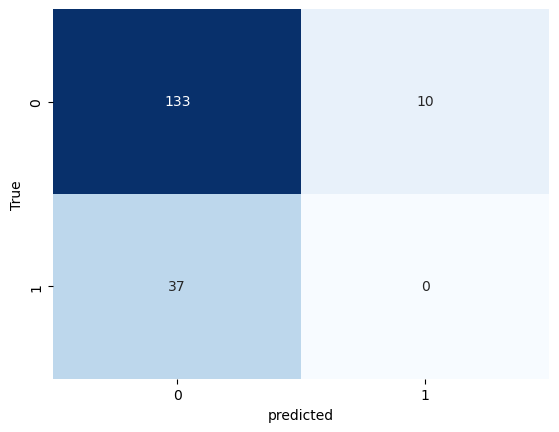

In [34]:
print('confusion matrix:')
conf_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('predicted')
plt.ylabel('True')
plt.show()